In [72]:
import numpy as np
import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import pandas as pd
from collections import defaultdict
%matplotlib inline

In [8]:
def load_pickle_file(file):
    with open(file, 'rb') as loaded_file:
        return pickle.load(loaded_file)

In [142]:
cbow_naive_opt = load_pickle_file("./optimization_log_Fixed_GRU_easy.p")

In [143]:
def parse_optimization_top(opt_dict, index=0):
    parsed_dict = defaultdict(lambda: defaultdict(lambda: dict()))
    
    def parse_key(key):
        first_split = key.split(", ")
        embed = first_split[0].split(":")[1]
        hidden = first_split[1].split(":")[1]
        lr = first_split[2].split(":")[1]
        return int(embed), int(hidden), float(lr)
    
    for key, value in opt_dict.items():
        embed, hidden, lr = parse_key(key)
        top = value[index]
        parsed_dict[lr][hidden][embed] = top
    
    return parsed_dict

In [144]:
cbow_naive_opt_top_1 = parse_optimization_top1(cbow_naive_opt)
print(cbow_naive_opt_top_1[0.001][56])

{100.0: 0.4398, 150.0: 0.4044, 200.0: 0.4252, 250.0: 0.4356, 300.0: 0.4388, 350.0: 0.4406}


In [145]:
def create_dataframes(opt_dict):
    largeDF = pd.DataFrame.from_dict(opt_dict[0.001])
    midDF = pd.DataFrame.from_dict(opt_dict[0.0001])
    smallDF = pd.DataFrame.from_dict(opt_dict[1e-05])
    return smallDF, midDF, largeDF

In [146]:
small_cbow_naive_df, mid_cbow_naive_df, large_cbow_naive_df = create_dataframes(cbow_naive_opt_top_1)

In [147]:
def create_heatmap(dataframe):
    cmap = sns.light_palette("red", as_cmap=True)
    sns.set_style('white')
    hmap = sns.heatmap(dataframe,
                cmap=cmap, 
                vmin=0,
                vmax=1,
                annot=True,
                fmt="0.3f",
                linewidths=0.5)

    # [tick.set_text("{0:0.0f}".format(float(tick.get_text()))) for tick in hmap.get_yticklabels()]
    # format text labels
    xticklabels = []
    for item in ax.get_xticklabels():
        item.set_text("{0:0.0f}".format(float(item.get_text())))
        xticklabels += [item]
    yticklabels = []
    for item in ax.get_yticklabels():
        item.set_text("{0:0.0f}".format(float(item.get_text())))
        yticklabels += [item]

    hmap.set_xticklabels(xticklabels)
    hmap.set_yticklabels(yticklabels)

    [tick.set_rotation(0) for tick in hmap.get_yticklabels()]
    hmap.set(xlabel="Hidden Layer Dimension", ylabel="Embedding Size")

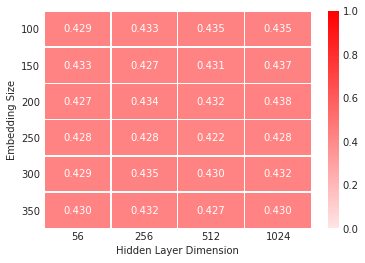

In [148]:
create_heatmap(small_cbow_naive_df)

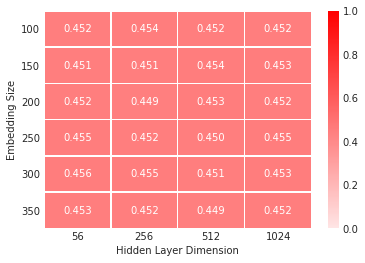

In [149]:
create_heatmap(mid_cbow_naive_df)

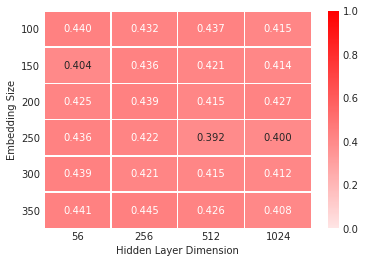

In [150]:
create_heatmap(large_cbow_naive_df)

In [171]:
# Processed files
cbow_easy = (load_pickle_file("./results_cbow_naive_easy.p"), "CBOW Naive")
cbow_hard = (load_pickle_file("./results_cbow_naive_hard.p"), "CBOW Naive")
cbow_reg_easy = (load_pickle_file("./results_cbow_reg_easy.p"), "CBOW Regression")
cbow_reg_hard = (load_pickle_file("./results_cbow_reg_hard.p"), "CBOW Regression")
gru_easy = (load_pickle_file("./results_Fixed_GRU_easy_best_params_[300, 56, 0.0001].p"), "GRU")
gru_hard = (load_pickle_file("./results_Fixed_GRU_hard_best_params_[300, 56, 0.0001].p"), "GRU")
gru_reg_easy = (load_pickle_file("./results_gru_reg_easy_best_params_[350, 1024, 0.001].p"), "GRU Regression")
gru_reg_hard = (load_pickle_file("./results_gru_reg_hard_best_params_[350, 1024, 0.001].p"), "GRU Regression")

files_easy = [cbow_easy, cbow_reg_easy, gru_easy, gru_reg_easy]
files_hard = [cbow_hard, cbow_reg_hard, gru_hard, gru_reg_hard]

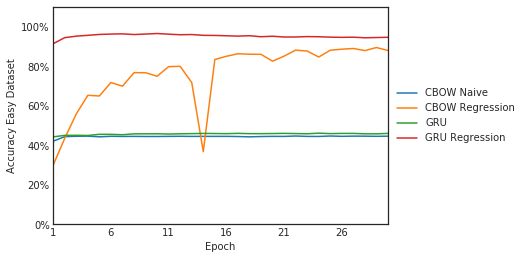

In [201]:
def create_df_for_key(lookup, key="top_1"):
    return pd.DataFrame(lookup[key])
key = "top_1"

plt.figure()
axes = None

for file_tup in files_easy:
    file_df = create_df_for_key(file_tup[0])
    if axes is None:
        axes = file_df.plot(label=file_tup[1])
    else:
        file_df.plot(ax=axes, label=file_tup[1])
        
axes.set_xlabel("Epoch")
axes.set_ylabel("Accuracy Easy Dataset")
axes.legend([x[1] for x in files_easy],loc='center left', bbox_to_anchor=(1.0, 0.5))
axes.set_ylim(0, 1.1)
axes.set_xlim(0, 29)
axes.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x+1:0.0f}"))
axes.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x*100:0.0f}%"))

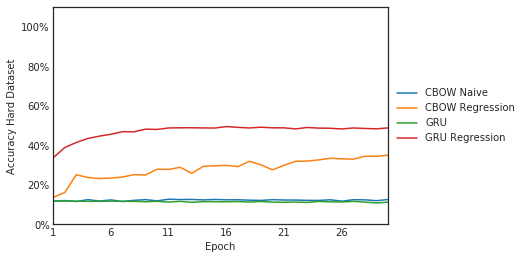

In [202]:
plt.figure()
axes = None

for file_tup in files_hard:
    file_df = create_df_for_key(file_tup[0])
    if axes is None:
        axes = file_df.plot(label=file_tup[1])
    else:
        file_df.plot(ax=axes, label=file_tup[1])
        
axes.set_xlabel("Epoch")
axes.set_ylabel("Accuracy Hard Dataset")
axes.legend([x[1] for x in files_hard],loc='center left', bbox_to_anchor=(1.0, 0.5))
axes.set_ylim(0, 1.1)
axes.set_xlim(0, 29)
axes.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x+1:0.0f}"))
axes.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x*100:0.0f}%"))

In [203]:
# Comparisons Preprocessing

In [222]:
cbow_easy = (load_pickle_file("./results_cbow_naive_easy.p"), "CBOW Naive Preprocessed")
cbow_hard = (load_pickle_file("./results_cbow_naive_hard.p"), "CBOW Naive Preprocessed")
cbow_reg_easy = (load_pickle_file("./results_cbow_reg_easy.p"), "CBOW Regression Preprocessed")
cbow_reg_hard = (load_pickle_file("./results_cbow_reg_hard.p"), "CBOW Regression Preprocessed")
gru_easy = (load_pickle_file("./results_Fixed_GRU_easy_best_params_[300, 56, 0.0001].p"), "GRU Preprocessed")
gru_hard = (load_pickle_file("./results_Fixed_GRU_hard_best_params_[300, 56, 0.0001].p"), "GRU Preprocessed")
gru_reg_easy = (load_pickle_file("./results_gru_reg_easy_best_params_[350, 1024, 0.001].p"), "GRU Regression Preprocessed")
gru_reg_hard = (load_pickle_file("./results_gru_reg_hard_best_params_[350, 1024, 0.001].p"), "GRU Regression Preprocessed")
unproc_cbow_easy = (load_pickle_file("./unproc_results_CBOW_NAIVE_easy_best_params_[150, 256, 0.0001].p"), "CBOW Naive Unprocessed")
unproc_cbow_hard = (load_pickle_file("./unproc_results_CBOW_NAIVE_hard_best_params_[150, 256, 0.0001].p"), "CBOW Naive Unprocessed")
unproc_cbow_reg_easy = (load_pickle_file("./unproc_results_CBOW_REG_easy_best_params_[300, 256, 0.001].p"), "CBOW Regression Unprocessed")
unproc_cbow_reg_hard = (load_pickle_file("./unproc_results_CBOW_REG_hard_best_params_[300, 256, 0.001].p"), "CBOW Regression Unprocessed")
unproc_gru_easy = (load_pickle_file("./unproc_results_Fixed_GRU_easy_best_params_[300, 56, 0.0001].p"), "GRU Unprocessed")
unproc_gru_hard = (load_pickle_file("./unproc_results_Fixed_GRU_hard_best_params_[300, 56, 0.0001].p"), "GRU Unprocessed")
unproc_gru_reg_easy = (load_pickle_file("./unproc_results_GRUREG_easy_best_params_[350, 1024, 0.001].p"), "GRU Regression Unprocessed")
unproc_gru_reg_hard = (load_pickle_file("./unproc_results_GRUREG_hard_best_params_[350, 1024, 0.001].p"), "GRU Regression Unprocessed")

comparisons_easy = [cbow_easy, unproc_cbow_easy, cbow_reg_easy, unproc_cbow_reg_easy, gru_easy, unproc_gru_easy, gru_reg_easy, unproc_gru_reg_easy]
comparisons_hard = [cbow_hard, unproc_cbow_hard, cbow_reg_hard, unproc_cbow_reg_hard, gru_hard, unproc_gru_hard, gru_reg_hard, unproc_gru_reg_hard]

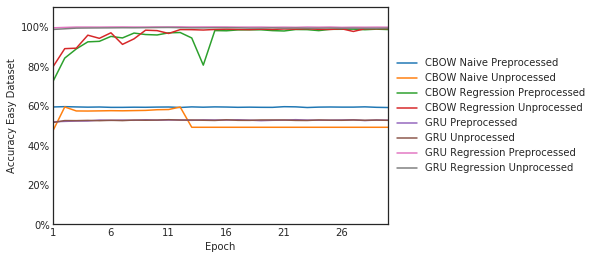

In [227]:
def create_df_for_key(lookup, key="top_5"):
    return pd.DataFrame(lookup[key])

plt.figure()
axes = None

for file_tup in comparisons_easy:
    file_df = create_df_for_key(file_tup[0])
    if axes is None:
        axes = file_df.plot(label=file_tup[1])
    else:
        file_df.plot(ax=axes, label=file_tup[1])
        
axes.set_xlabel("Epoch")
axes.set_ylabel("Accuracy Easy Dataset")
axes.legend([x[1] for x in comparisons_easy],loc='center left', bbox_to_anchor=(1.0, 0.5))
axes.set_ylim(0, 1.1)
axes.set_xlim(0, 29)
axes.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x+1:0.0f}"))
axes.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x*100:0.0f}%"))

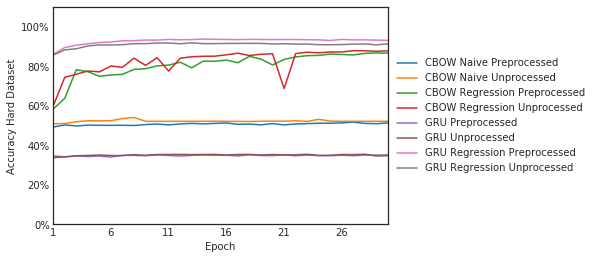

In [228]:
plt.figure()
axes = None

for file_tup in comparisons_hard:
    file_df = create_df_for_key(file_tup[0])
    if axes is None:
        axes = file_df.plot(label=file_tup[1])
    else:
        file_df.plot(ax=axes, label=file_tup[1])
        
axes.set_xlabel("Epoch")
axes.set_ylabel("Accuracy Hard Dataset")
axes.legend([x[1] for x in comparisons_hard],loc='center left', bbox_to_anchor=(1.0, 0.5))
axes.set_ylim(0, 1.1)
axes.set_xlim(0, 29)
axes.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x+1:0.0f}"))
axes.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x*100:0.0f}%"))